Import Data

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import os
import seaborn as sns

In [14]:
path = os.getcwd()
airbnb = pd.read_csv(os.path.join(path,'airbnb.csv'))

Overview Data

In [15]:
airbnb.head(5)

,host_since_year,host_since_anniversary,neighbourhood_cleansed,city,state,zipcode,country,latitude,longitude,property_type,...,host_response_time,host_response_rate,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,2008,2021/8/11,Westerpark,Amsterdam,North Holland,1095,Netherlands,52.373021,4.868461,Apartment,...,within a day,0.80,11,98,10.0,10.0,9.0,10.0,10.0,10.0
1,2008,2021/9/24,Oostelijk Havengebied - Indische Buurt,Amsterdam,North Holland,1095,Netherlands,52.365755,4.941419,Apartment,...,within an hour,1.00,108,97,10.0,10.0,10.0,10.0,9.0,10.0
2,2008,2021/10/19,De Baarsjes - Oud-West,Amsterdam,North Holland,1017,Netherlands,52.369388,4.866972,Apartment,...,within a few hours,1.00,15,92,9.0,9.0,10.0,10.0,9.0,9.0
3,2008,2021/11/30,Centrum-Oost,Amsterdam,North Holland,1054,Netherlands,52.361905,4.888050,Apartment,...,within a day,1.00,20,97,10.0,10.0,10.0,10.0,10.0,10.0
4,2008,2021/12/17,Centrum-West,Amsterdam,North Holland,1011,Netherlands,52.371533,4.887057,Apartment,...,within a day,0.89,1,100,8.0,10.0,8.0,10.0,10.0,6.0


In [16]:
airbnb[['Year', 'Month', 'Day']] = airbnb.host_since_anniversary.str.split('/', expand=True)
airbnb.head(5)

,host_since_year,host_since_anniversary,neighbourhood_cleansed,city,state,zipcode,country,latitude,longitude,property_type,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,Year,Month,Day
0,2008,2021/8/11,Westerpark,Amsterdam,North Holland,1095,Netherlands,52.373021,4.868461,Apartment,...,98,10.0,10.0,9.0,10.0,10.0,10.0,2021,8,11
1,2008,2021/9/24,Oostelijk Havengebied - Indische Buurt,Amsterdam,North Holland,1095,Netherlands,52.365755,4.941419,Apartment,...,97,10.0,10.0,10.0,10.0,9.0,10.0,2021,9,24
2,2008,2021/10/19,De Baarsjes - Oud-West,Amsterdam,North Holland,1017,Netherlands,52.369388,4.866972,Apartment,...,92,9.0,9.0,10.0,10.0,9.0,9.0,2021,10,19
3,2008,2021/11/30,Centrum-Oost,Amsterdam,North Holland,1054,Netherlands,52.361905,4.888050,Apartment,...,97,10.0,10.0,10.0,10.0,10.0,10.0,2021,11,30
4,2008,2021/12/17,Centrum-West,Amsterdam,North Holland,1011,Netherlands,52.371533,4.887057,Apartment,...,100,8.0,10.0,8.0,10.0,10.0,6.0,2021,12,17


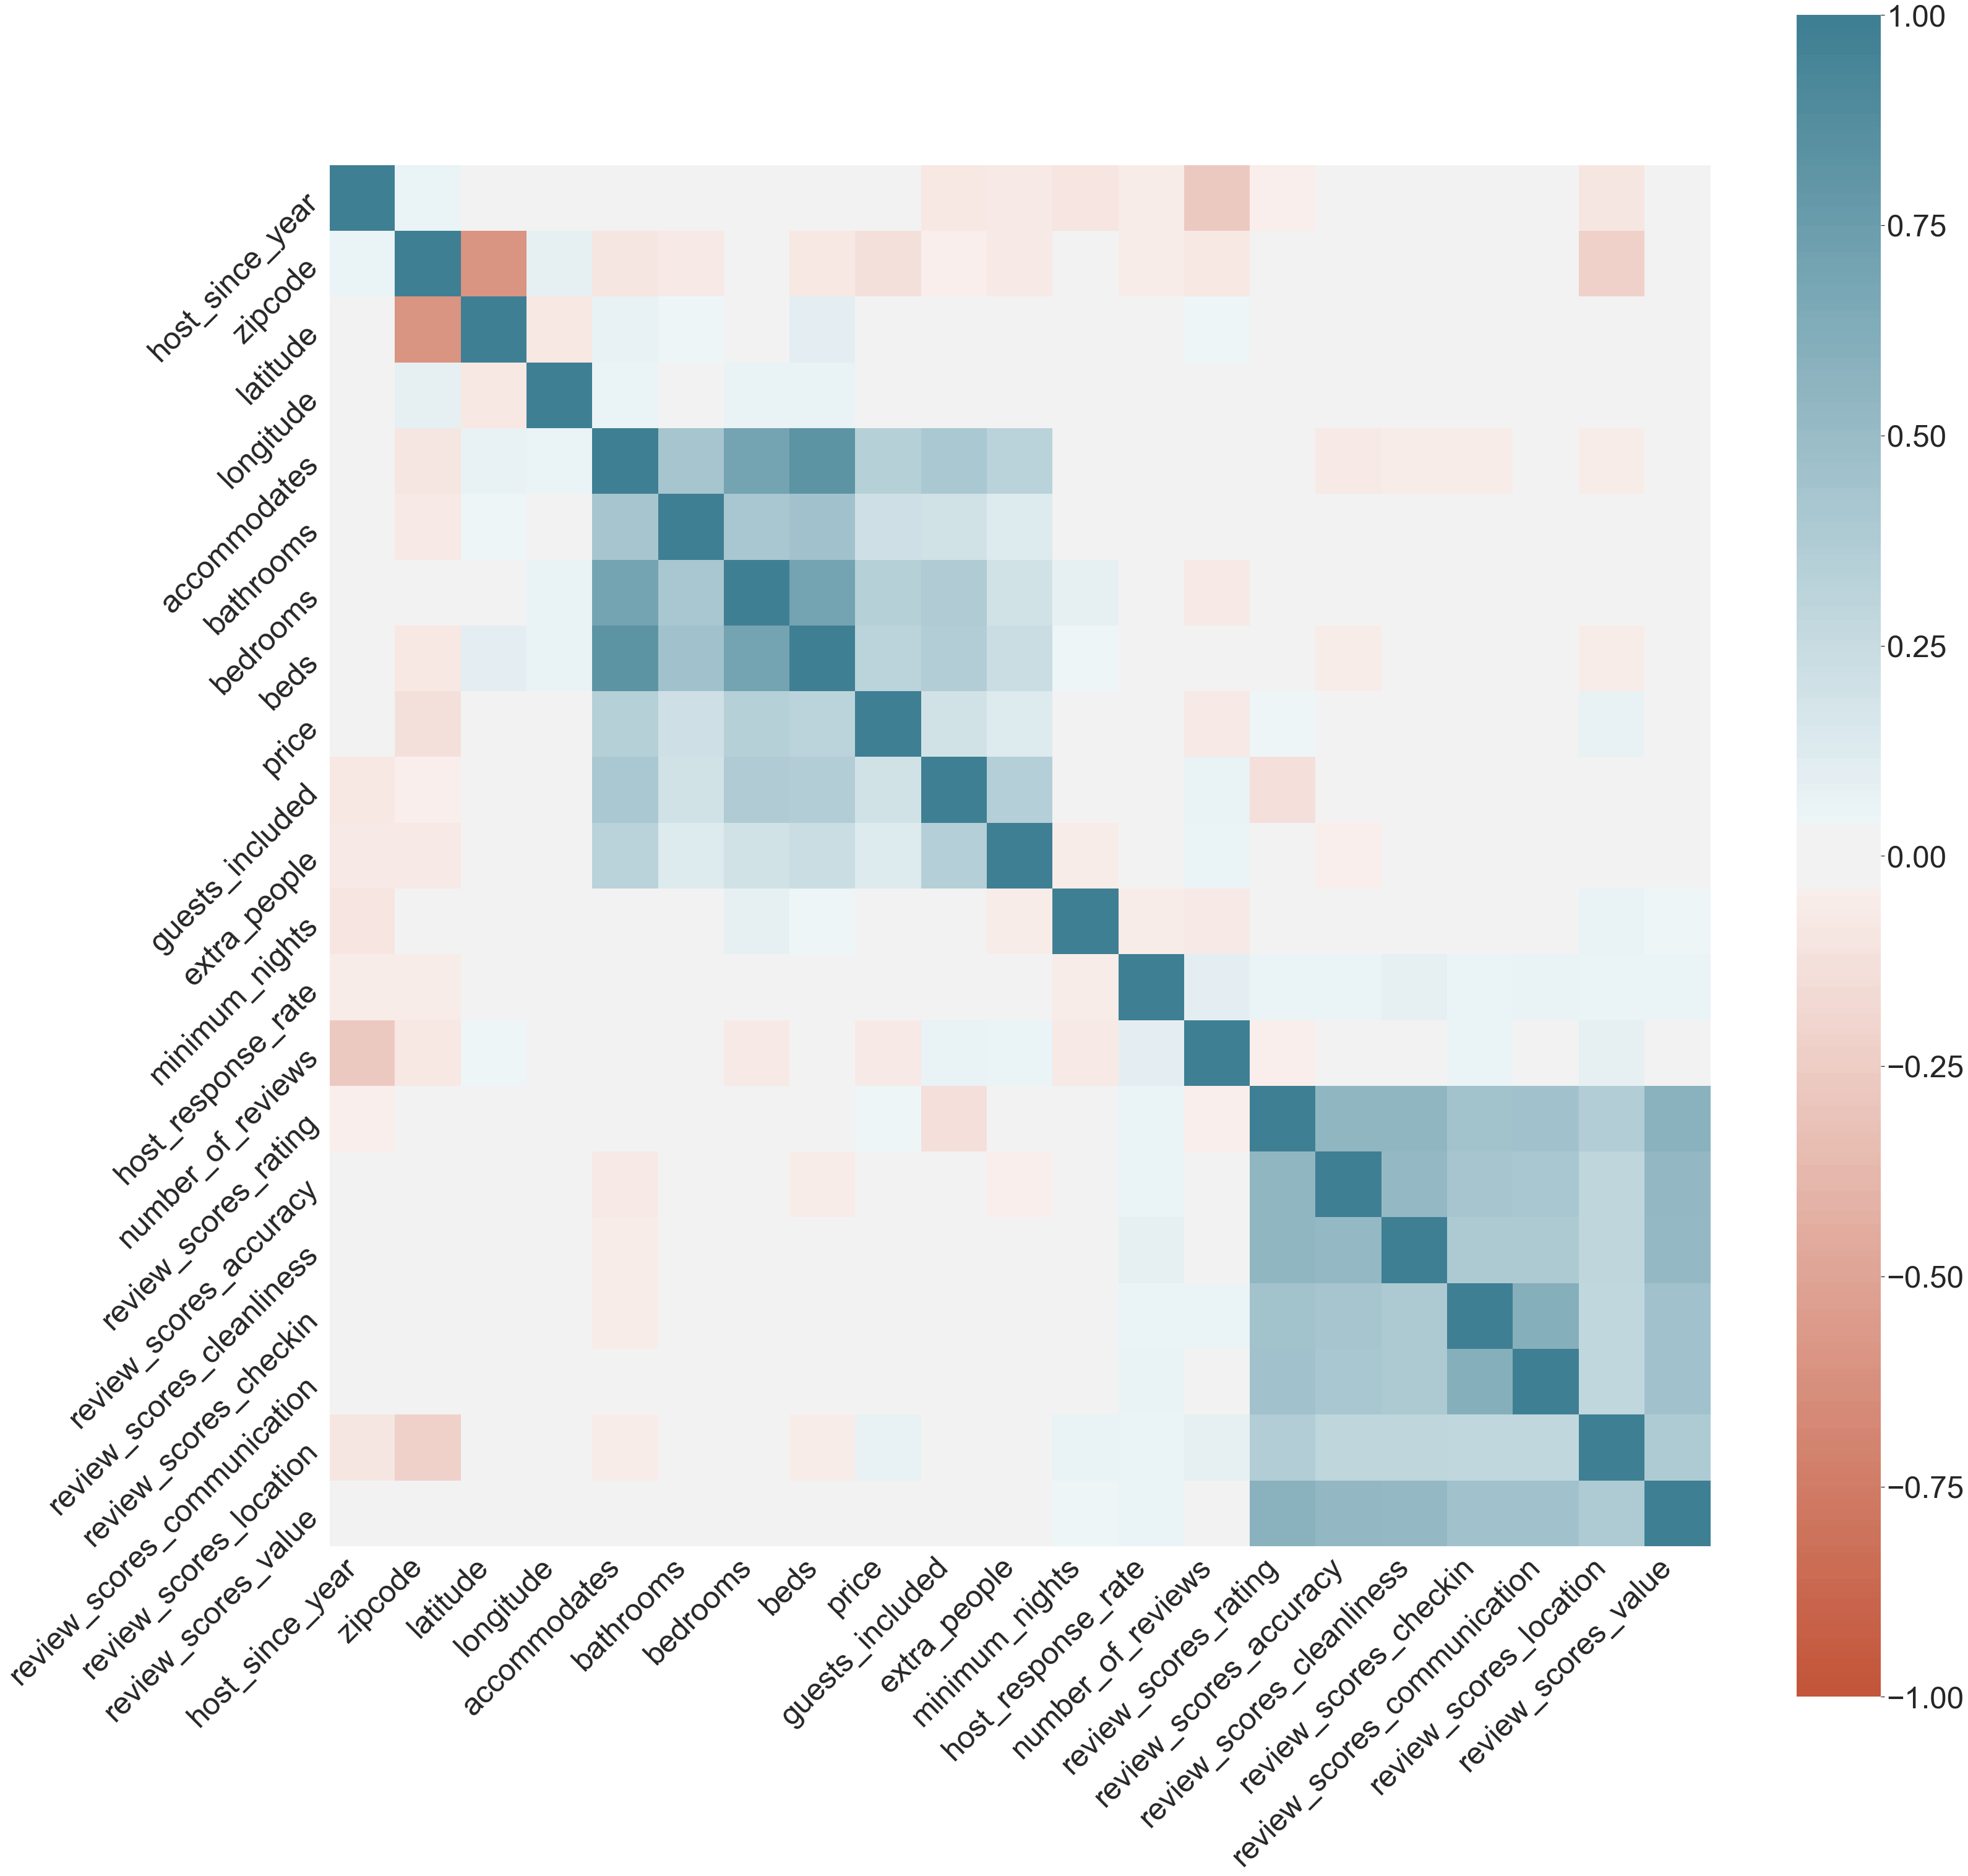

In [17]:
corr = airbnb.corr()
fig = plt.figure(figsize=(50,50)) 
sns.set(font_scale = 4.5)
ax = sns.heatmap(corr,vmin = -1, vmax = 1, center = 0, square = True, cmap = sns.diverging_palette(20, 220, n=200))
ax.labelsize = 30
ax.set_xticklabels( ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right',fontsize = 50)
ax.set_yticklabels( ax.get_yticklabels(), rotation = 45, horizontalalignment = 'right',fontsize = 50)
plt.savefig('Corr',bbox_inches = 'tight')
plt.show()

In [5]:
airbnb.columns

Index(['host_since_year', 'host_since_anniversary', 'neighbourhood_cleansed',
       'city', 'state', 'zipcode', 'country', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'host_response_time', 'host_response_rate',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'Year', 'Month', 'Day'],
      dtype='object')

In [6]:
airbnb.dtypes

host_since_year                  int64
host_since_anniversary          object
neighbourhood_cleansed          object
city                            object
state                           object
zipcode                          int64
country                         object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bathrooms                      float64
bedrooms                         int64
beds                             int64
bed_type                        object
price                            int64
guests_included                  int64
extra_people                     int64
minimum_nights                   int64
host_response_time              object
host_response_rate             float64
number_of_reviews                int64
review_scores_rating             int64
review_scores_accuracy         float64
review_scores_cleanliness

In [7]:
airbnb.shape

(7831, 33)

Check Missing Values

In [8]:
(100*airbnb.isnull().sum()/airbnb.shape[0]).round(4)

host_since_year                0.0
host_since_anniversary         0.0
neighbourhood_cleansed         0.0
city                           0.0
state                          0.0
zipcode                        0.0
country                        0.0
latitude                       0.0
longitude                      0.0
property_type                  0.0
room_type                      0.0
accommodates                   0.0
bathrooms                      0.0
bedrooms                       0.0
beds                           0.0
bed_type                       0.0
price                          0.0
guests_included                0.0
extra_people                   0.0
minimum_nights                 0.0
host_response_time             0.0
host_response_rate             0.0
number_of_reviews              0.0
review_scores_rating           0.0
review_scores_accuracy         0.0
review_scores_cleanliness      0.0
review_scores_checkin          0.0
review_scores_communication    0.0
review_scores_locati

Date

Text Mapping

In [67]:
#airbnb['property_type'].unique()

array(['Apartment', 'House', 'Loft', 'Boat', 'Bed & Breakfast',
       'Camper/RV', 'Villa', 'Cabin', 'Other', 'Chalet', 'Earth House',
       'Yurt', 'Treehouse', 'Hut', 'Dorm'], dtype=object)

In [10]:
#airbnb['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [11]:
#airbnb['bed_type'].unique()

array(['Real Bed', 'Futon', 'Pull-out Sofa', 'Airbed', 'Couch'],
      dtype=object)

In [12]:
#airbnb['host_response_time'].unique()

array(['within a day', 'within an hour', 'within a few hours',
       'a few days or more'], dtype=object)

In [13]:
#airbnb = pd.get_dummies(airbnb, columns=["room_type"], prefix=["room_type_is"])

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
airbnb['property_type_le'] = le.fit_transform(airbnb['property_type'])
airbnb['bed_type_le'] = le.fit_transform(airbnb['bed_type'])
airbnb['host_response_time_le'] = le.fit_transform(airbnb['host_response_time'])
airbnb['room_type_le'] = le.fit_transform(airbnb['room_type'])

airbnb['neighbourhood_cleansed_le'] = le.fit_transform(airbnb['neighbourhood_cleansed'])
airbnb['city_le'] = le.fit_transform(airbnb['city'])
airbnb['state_le'] = le.fit_transform(airbnb['state'])
airbnb['country_le'] = le.fit_transform(airbnb['country'])
airbnb['host_since_year_le'] = le.fit_transform(airbnb['host_since_year'])

Geography

In [10]:
#range_quantile = (airbnb['longitude'].quantile(0.003),airbnb['longitude'].quantile(0.997),airbnb['latitude'].quantile(0.003),airbnb['latitude'].quantile(0.997))
#print(range_quantile)

In [10]:
range = (airbnb['longitude'].min(), airbnb['longitude'].max(),airbnb['latitude'].min(),airbnb['latitude'].max())
print(range)

(4.763264201, 5.019667018, 52.29156935, 52.42538071)


In [12]:
pic = plt.imread('C:/Users/10502/Documents/大三资料/Paper/paper model/geo.png')

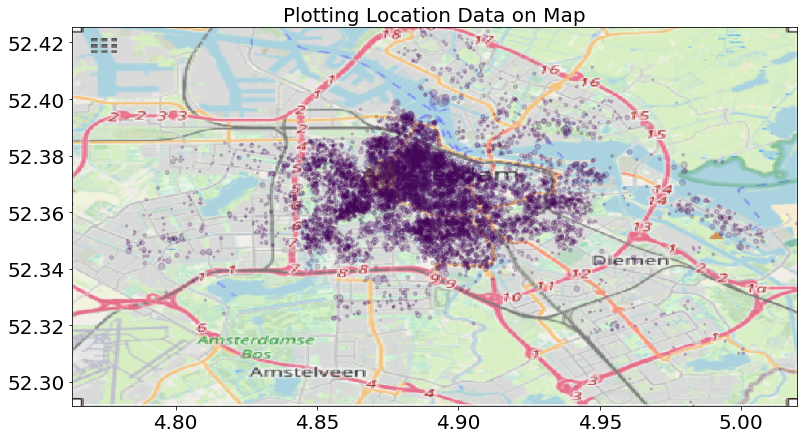

In [40]:
fig,ax = plt.subplots(figsize = (13,13))
area = 1000*(airbnb['price'] - airbnb['price'].min())/(airbnb['price'].max() - airbnb['price'].min())
ax.scatter(airbnb['longitude'], airbnb['latitude'], zorder=1, alpha=0.2, c=area, s = area)
ax.set_title('Plotting Location Data on Map',fontsize = 20)
ax.set_xlim(range[0], range[1])
ax.set_ylim(range[2], range[3])
for label in (ax.get_xticklabels()+ax.get_yticklabels()):
    label.set_fontsize(20)
ax.imshow(pic, zorder = 0, extent = range, aspect = 'equal')
plt.savefig('geo_pickup_new.jpeg', dpi = 300)

In [34]:
plt.savefig('geo_pickup1')

<Figure size 432x288 with 0 Axes>

Create Feature

Y - transform

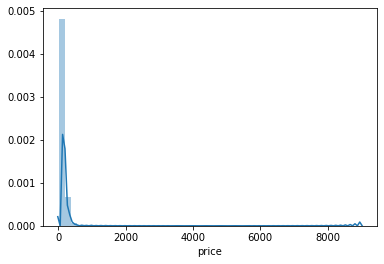

In [15]:
sns.distplot(airbnb['price'])
plt.savefig('y')
plt.show()

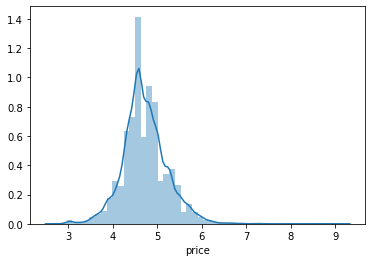

In [16]:
sns.distplot(np.log(airbnb['price']))
plt.savefig('y-trans')
plt.show()

Plotting

In [58]:
airbnb['accommodates'].unique()

array([ 4,  2,  6,  3,  1,  8, 10,  5,  7,  9, 16, 12, 15, 14],
      dtype=int64)

In [18]:
viz_data = airbnb.copy()
mask = viz_data['price']<=np.quantile(viz_data['price'],0.99)
viz_data_2 = viz_data[mask]

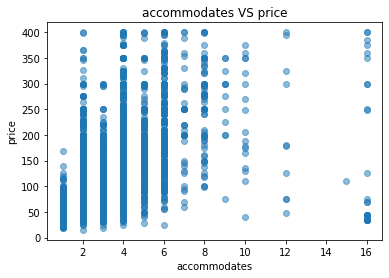

In [20]:
plt.scatter(viz_data_2['accommodates'], viz_data_2['price'], alpha=0.5)
plt.xlabel("accommodates")
plt.ylabel("price")
plt.title("accommodates VS price")
plt.savefig('acc_p')
plt.show()

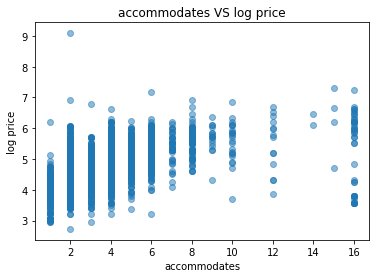

In [21]:
plt.scatter(airbnb['accommodates'], np.log(airbnb['price']), alpha=0.5)
plt.xlabel("accommodates")
plt.ylabel("log price")
plt.title("accommodates VS log price")
plt.savefig('acc_p_log')
plt.show()

In [67]:
airbnb['bedrooms'].unique()

array([ 2,  1,  0,  4,  5,  3, 10,  7,  9,  6,  8], dtype=int64)

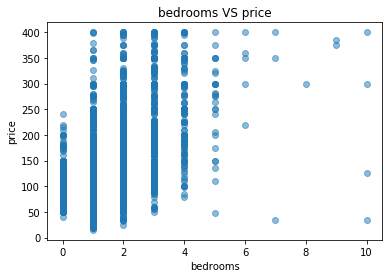

In [35]:
plt.scatter(viz_data_2['bedrooms'], viz_data_2['price'], alpha=0.5)
plt.xlabel("bedrooms")
plt.ylabel("price")
plt.title("bedrooms VS price")
plt.savefig('bed_o_p')
plt.show()

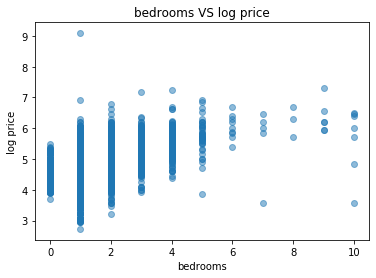

In [23]:
plt.scatter(airbnb['bedrooms'], np.log(airbnb['price']), alpha=0.5)
plt.xlabel("bedrooms")
plt.ylabel("log price")
plt.title("bedrooms VS log price")
plt.savefig('bed_p_log')
plt.show()

In [72]:
airbnb['guests_included'].unique()

array([ 4,  1,  2,  0,  3,  6,  5,  8, 16,  7, 13, 24, 15, 10, 50, 35],
      dtype=int64)

In [24]:
guest_data = airbnb.copy()
mask_2 = guest_data['guests_included']<=20
guest_data_2 = guest_data[mask_2]
mask_3 = guest_data['price']<=np.quantile(viz_data['price'],0.99)
guest_data_3 = guest_data_2[mask_3]

C:\Users\10502\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


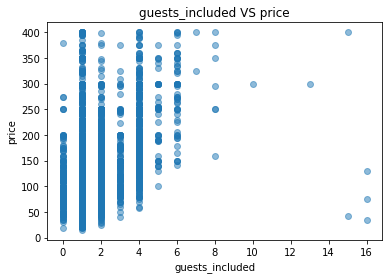

In [25]:
plt.scatter(guest_data_3['guests_included'], guest_data_3['price'], alpha=0.5)
plt.xlabel("guests_included")
plt.ylabel("price")
plt.title("guests_included VS price")
plt.savefig('gue_p')
plt.show()

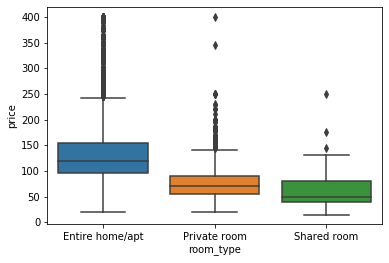

In [32]:
ax = sns.boxplot(x="room_type", y="price", data=viz_data_2)
ax.get_figure().savefig('room_p.png')

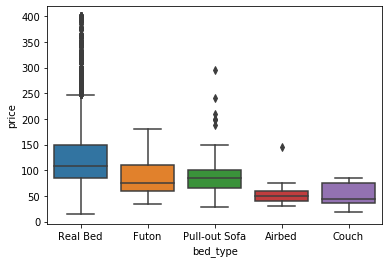

In [33]:
ax = sns.boxplot(x="bed_type", y="price", data=viz_data_2)
ax.get_figure().savefig('bed_p.png')

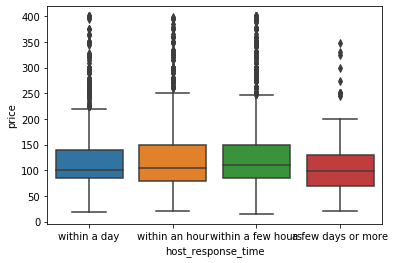

In [34]:
ax = sns.boxplot(x="host_response_time", y="price", data=viz_data_2)
ax.get_figure().savefig('host_p.png')

Split Train and Test Data

In [102]:
X = airbnb[['host_since_year_le','zipcode', 'latitude', 'longitude','accommodates', 'bathrooms', 'bedrooms',
       'beds',  'guests_included', 'extra_people',
       'minimum_nights',  'host_response_rate',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'Year', 'Month', 'property_type_le',
       'bed_type_le', 'host_response_time_le', 'room_type_le',
       'neighbourhood_cleansed_le', 'city_le', 'state_le', 'country_le',
       'log accommodates', 'log bedrooms', 'log room_type_le','log neighbourhood_cleansed_le',
       'square accommodates', 'square bedrooms', 'square room_type_le', 'square neighbourhood_cleansed_le']]
y = airbnb['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.95, test_size = 0.05, random_state=0)
y_train = np.log(y_train)

In [103]:
airbnb.describe().round(3)

,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,...,country_le,host_since_year_le,log accommodates,log bedrooms,log room_type_le,log neighbourhood_cleansed_le,square accommodates,square bedrooms,square room_type_le,square neighbourhood_cleansed_le
count,7831.000,7831.000,7831.000,7831.000,7831.000,7831.000,7831.000,7831.000,7831.000,7831.000,...,7831.0,7831.000,7831.000,7831.000,7831.000,7831.000,7831.000,7831.000,7831.000,7831.000
mean,1048.876,52.367,4.888,3.114,1.103,1.416,1.983,129.031,1.659,13.606,...,0.0,9.932,1.350,0.829,0.137,2.447,12.809,2.792,0.212,183.836
std,28.765,0.014,0.030,1.764,0.407,0.887,1.653,128.042,1.400,18.905,...,0.0,1.212,0.338,0.317,0.281,0.489,22.832,5.278,0.488,177.815
min,1011.000,52.292,4.763,1.000,0.000,0.000,1.000,15.000,0.000,0.000,...,0.0,0.000,0.693,0.000,0.000,0.000,1.000,0.000,0.000,0.000
25%,1017.000,52.357,4.870,2.000,1.000,1.000,1.000,85.000,1.000,0.000,...,0.0,9.000,1.099,0.693,0.000,2.079,4.000,1.000,0.000,49.000
50%,1054.000,52.367,4.886,2.000,1.000,1.000,1.000,109.000,1.000,0.000,...,0.0,10.000,1.099,0.693,0.000,2.303,4.000,1.000,0.000,81.000
75%,1072.000,52.376,4.903,4.000,1.000,2.000,2.000,150.000,2.000,25.000,...,0.0,11.000,1.609,1.099,0.000,2.996,16.000,4.000,0.000,361.000
max,1234.000,52.425,5.020,16.000,8.000,10.000,16.000,9000.000,50.000,235.000,...,0.0,20.000,2.833,2.398,1.099,3.178,256.000,100.000,4.000,529.000


In [104]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)